In [1]:
#pip install missingno

Importing all neccessary libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno

In [3]:
#pip install optuna

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold

storing csv as a pandas DataFrame

In [5]:
df_laptop = pd.read_csv("laptop_data.csv")

In [6]:
#Exploring the first five records of our dataset
df_laptop.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
#Find the shape of our data?
print("The number of dimensions (rows, columns) of our dataset is: {}".format(df_laptop.shape))

The number of dimensions (rows, columns) of our dataset is: (1303, 12)


In [8]:
#Find the data types of dataset?
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [9]:
#Finding missing values and percentage of missing values?
print("The number of missing values: \n"+ str(df_laptop.isnull().sum()) +"\n\n" + "The Percentage of Missing Values: \n" + str(df_laptop.isnull().sum() / len(df_laptop) * 100))

The number of missing values: 
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

The Percentage of Missing Values: 
Unnamed: 0          0.0
Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64


<AxesSubplot:>

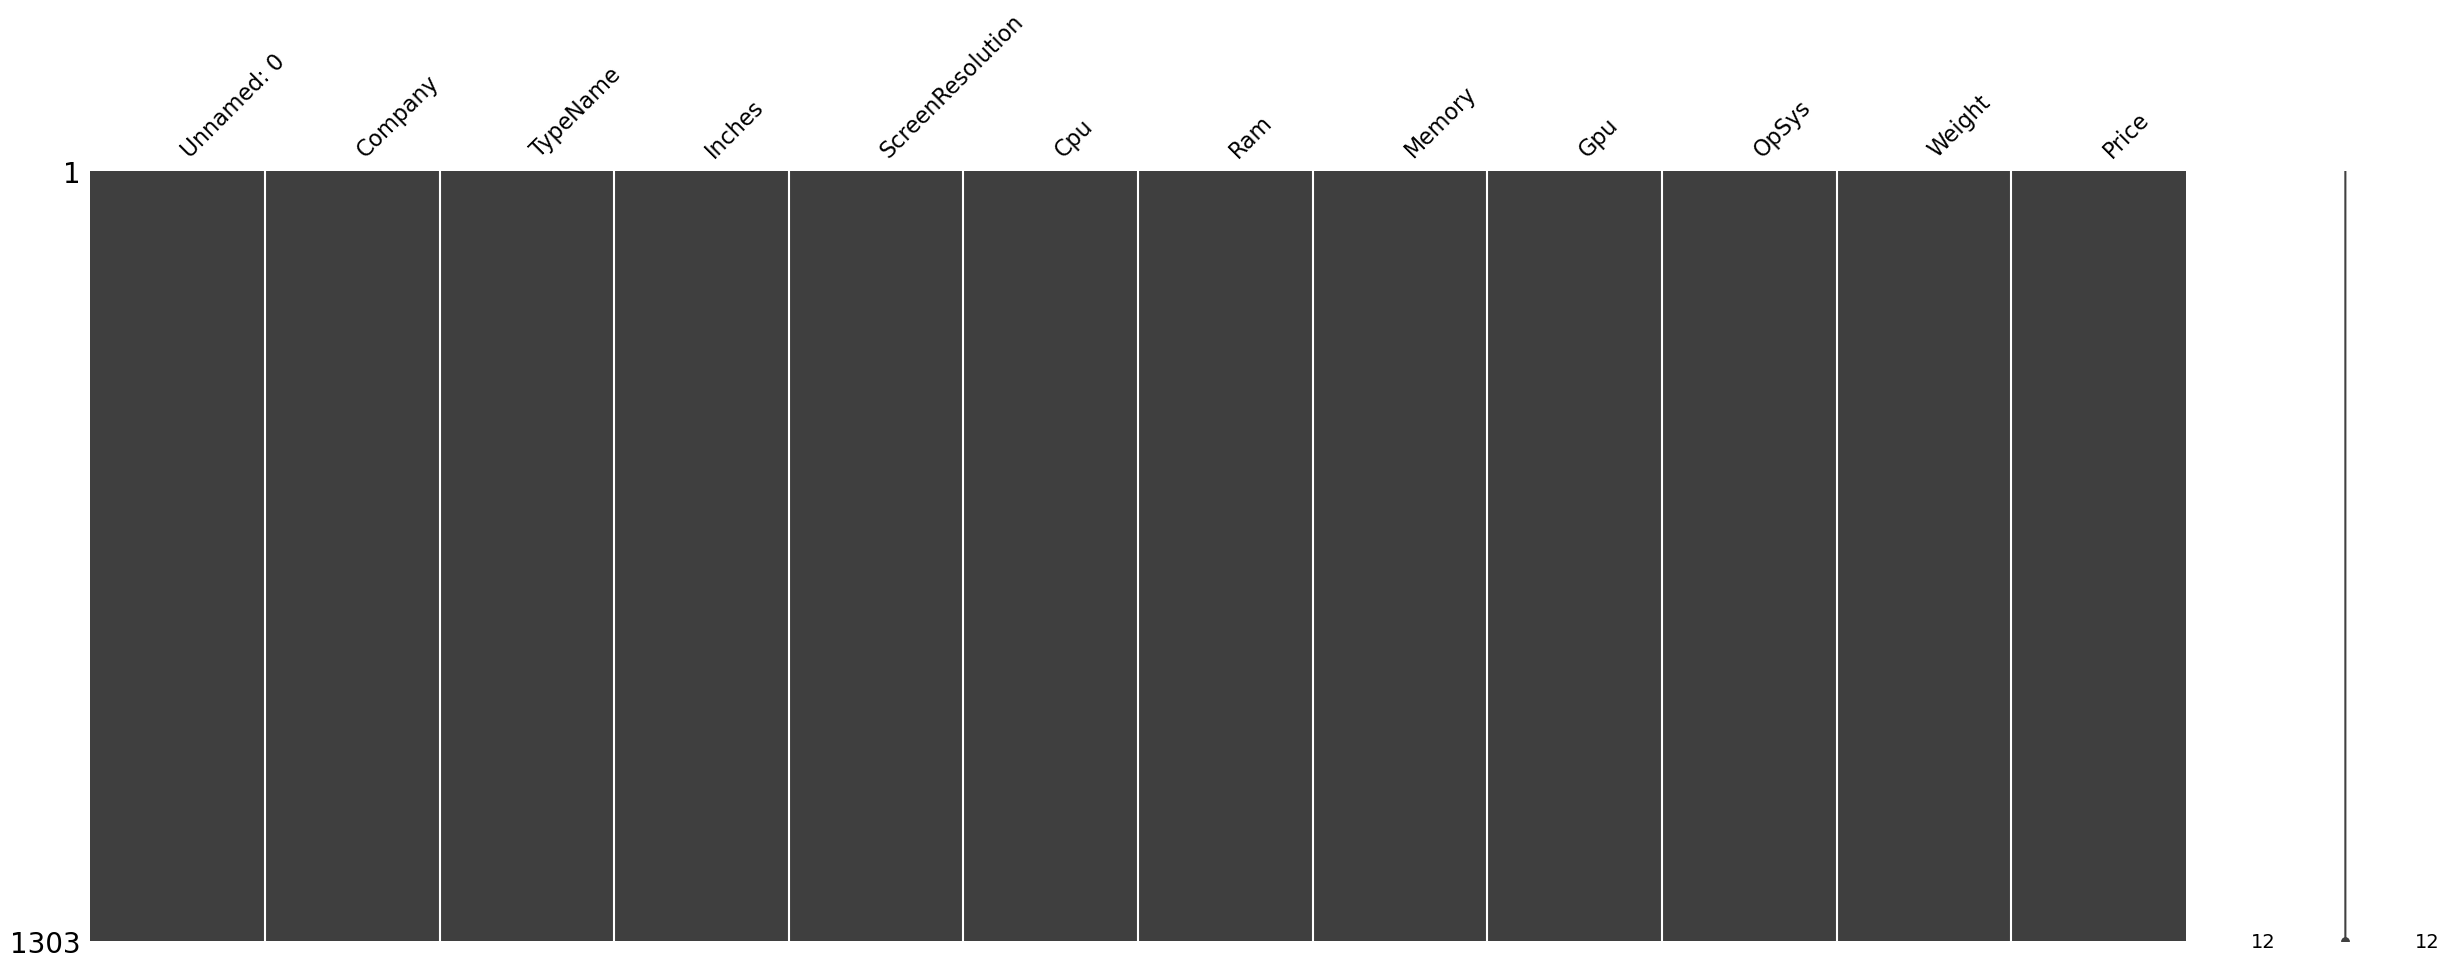

In [10]:
# Viewing null values
msno.matrix(df_laptop, figsize = (30,10))

In [11]:
#Finding duplicate records and percentage of duplicate values?
print("The number of duplicate values is: {}".format(df_laptop.duplicated().sum()))

The number of duplicate values is: 0


In [12]:
#Summary Statistics of our Dataset
df_laptop.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [13]:
#adding column name for empty column name
df_laptop.rename(columns={'Unnamed: 0': 'SL NO'}, inplace=True)

In [14]:
print(df_laptop.columns)

Index(['SL NO', 'Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')


In [15]:
#categorizes the input value into specific groups based on predefined conditions and returns an integer representing the group number
def group(value):
    if value >= 25000000:
        return 0
    elif value >= 20000000  and value < 25000000:
        return 1
    elif value >= 15000000  and value < 20000000:
        return 2
    elif value >= 10000000  and value < 15000000:
        return 3
    else:
        return 4

In [16]:
#Remove 'kg' from the 'Weight' column in df_laptop  dataframe.
df_laptop['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)

In [17]:
#Convert 'Weight' values to float data type in df_laptop dataframe
df_laptop['Weight'] = df_laptop['Weight'].astype("float64")

Grouping Variables

In [18]:
#Calculate the median price for each unique 'Cpu' and 'Gpu' group and assign the values to 'CPU_avg' and 'GPU_avg' columns in df_laptop
df_laptop['CPU_avg'] = df_laptop.groupby(['Cpu'])['Price'].transform('median').round(2)
df_laptop['GPU_avg'] = df_laptop.groupby(['Gpu'])['Price'].transform('median').round(2)

In [19]:
#Applying 'group' function to 'CPU_avg' and 'GPU_avg' columns, and creating 'cpu_group' and 'gpu_group' columns based on the results
df_laptop['cpu_group'] = df_laptop.apply(lambda x: group(x['CPU_avg']),axis=1)
df_laptop['gpu_group'] = df_laptop.apply(lambda x: group(x['GPU_avg']),axis=1)

# Exploratory Data Analysis

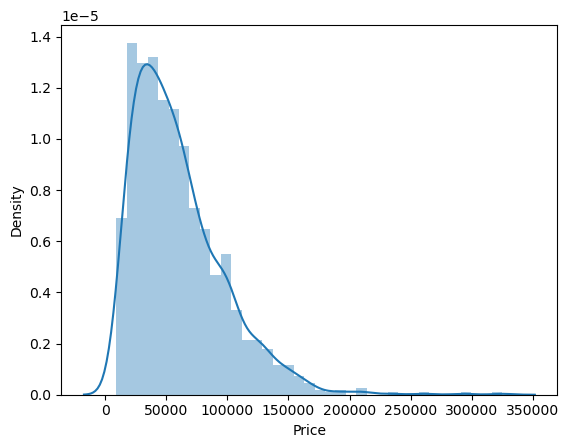

In [20]:
#Plotting the distribution of the 'Price' column using seaborn's distplot
sns.distplot(df_laptop['Price'])
plt.show()

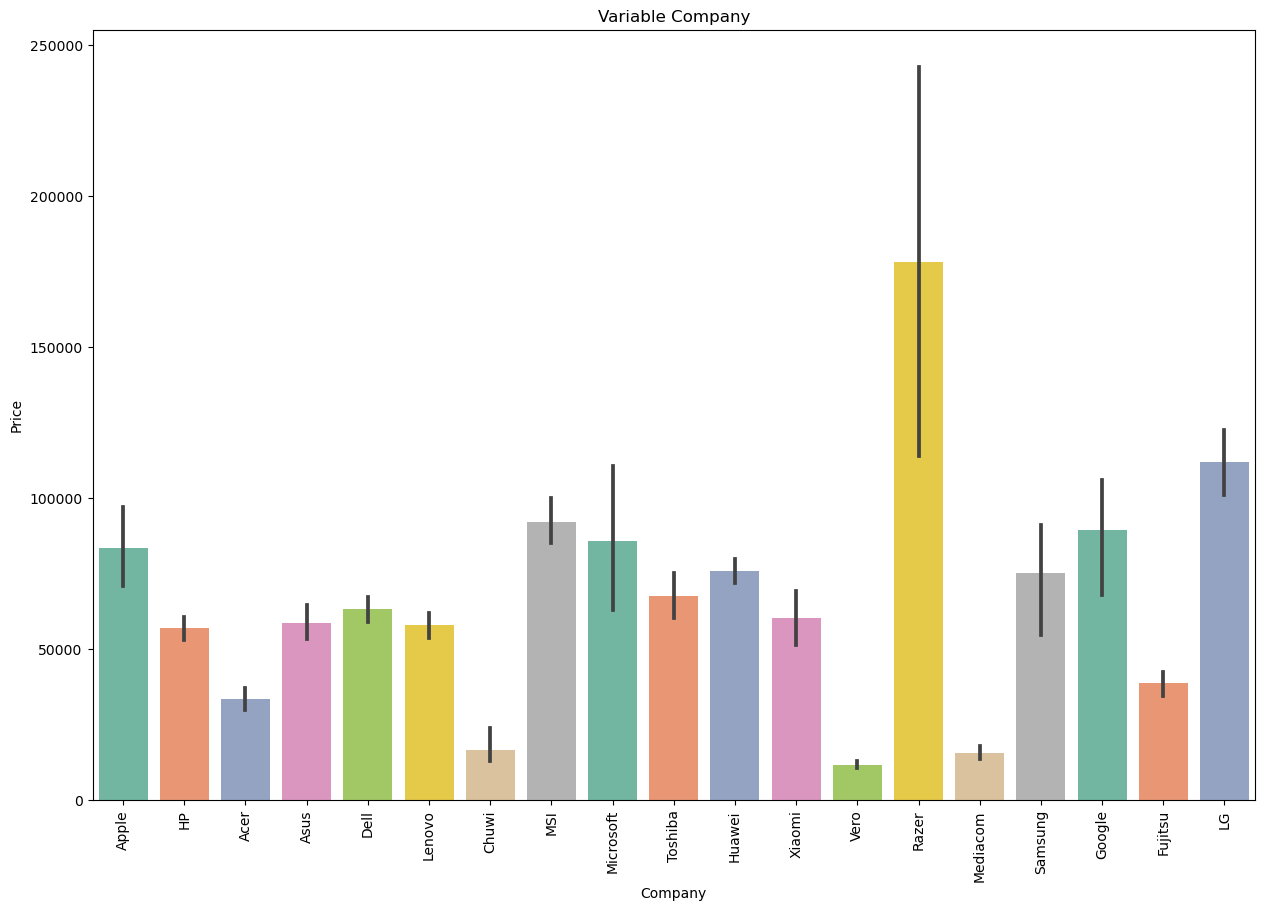

In [21]:
#Creating a bar plot to show the relationship between 'Company' and 'Price'
plt.figure(figsize=(15, 10))
plt.subplot()
plt.gca().set_title('Variable Company')
sns.barplot(x=df_laptop['Company'], y=df_laptop['Price'], palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:title={'center':'Variable Category'}, xlabel='TypeName', ylabel='count'>

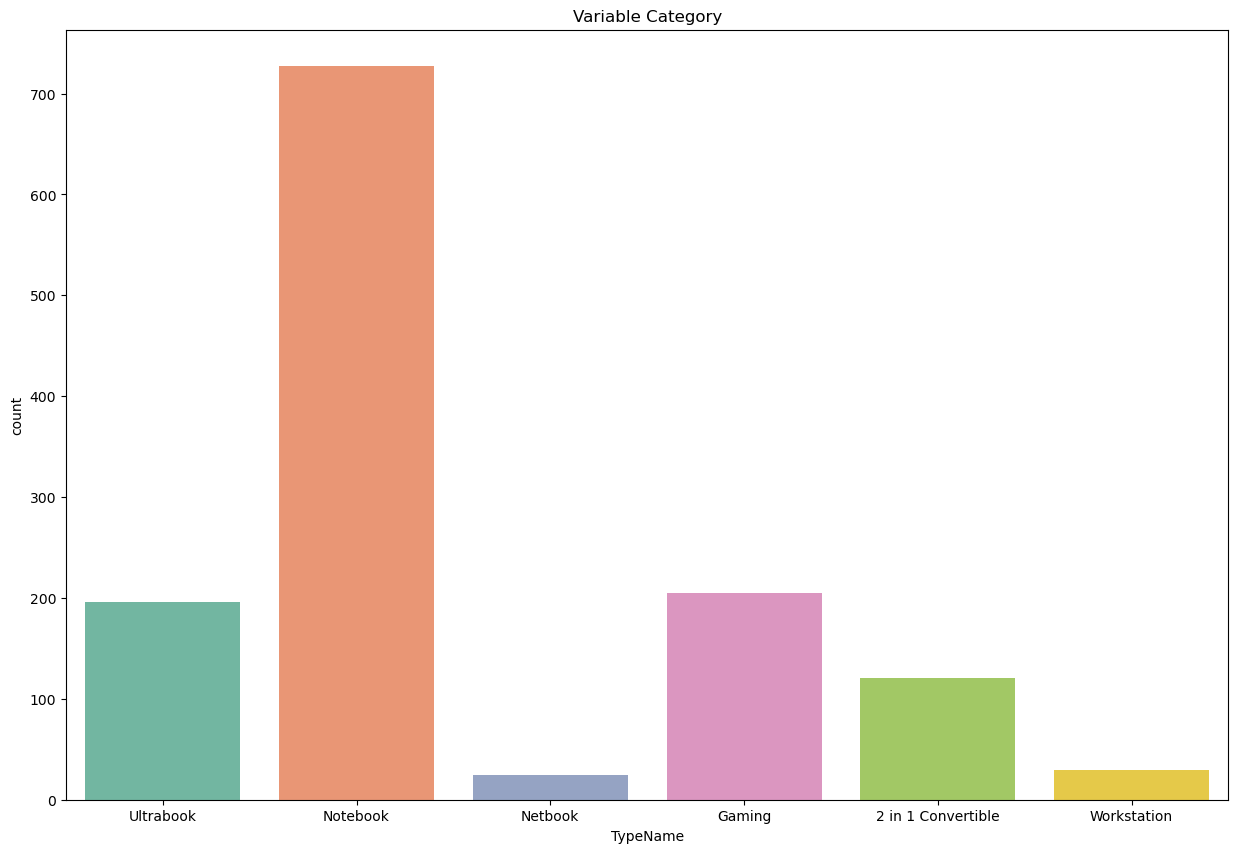

In [22]:
#Creating a count plot to visualize the distribution of 'TypeName' variable
plt.figure(figsize = (15, 10))
plt.subplot()
plt.gca().set_title('Variable Category')
sns.countplot(x = 'TypeName', palette = 'Set2', data = df_laptop)

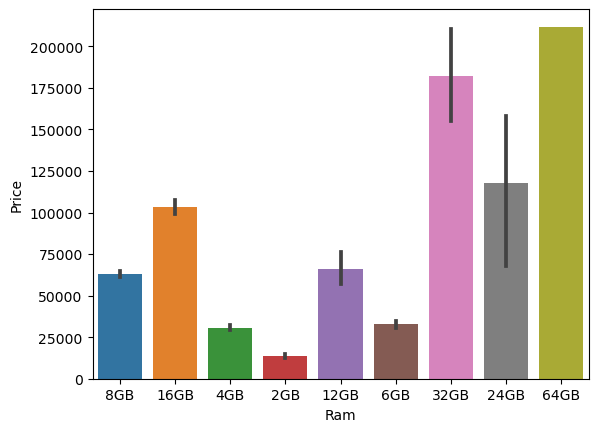

In [23]:
#creating Bar plot Ram vs Price
sns.barplot(df_laptop['Ram'], df_laptop['Price'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

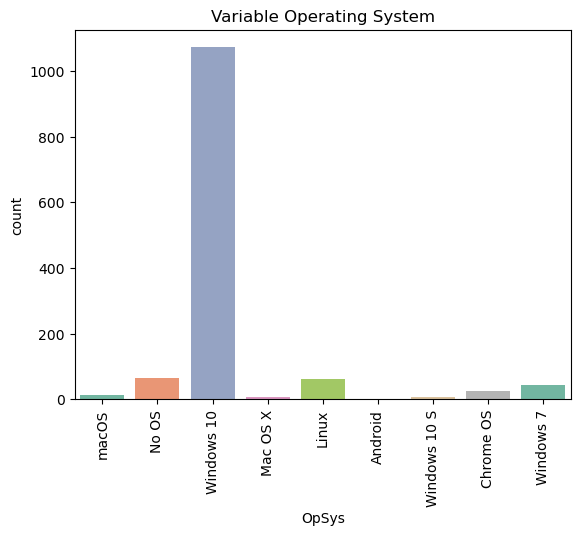

In [24]:
#creating Count plot for Operating System 
plt.subplot()
plt.gca().set_title('Variable Operating System')
sns.countplot(x = 'OpSys', palette = 'Set2', data = df_laptop)
plt.xticks(rotation='vertical')
plt.show

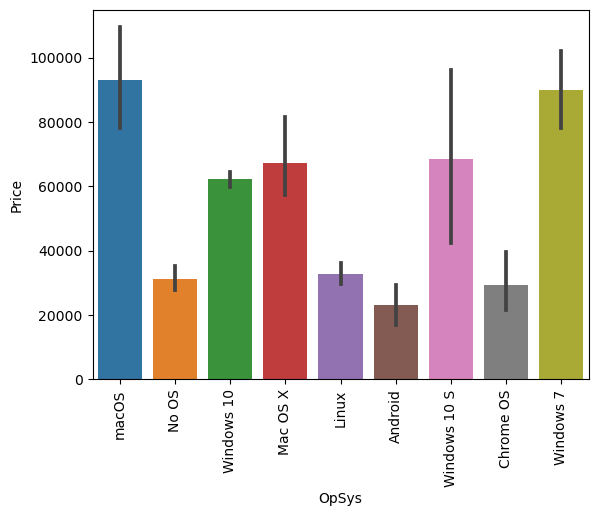

In [25]:
#creating barplot for OpSys vs Price
sns.barplot(df_laptop['OpSys'], df_laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [26]:
#Adding column 'Touchscreen' based on 'ScreenResolution' containing 'Touchscreen' keyword
df_laptop['Touchscreen'] = df_laptop['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

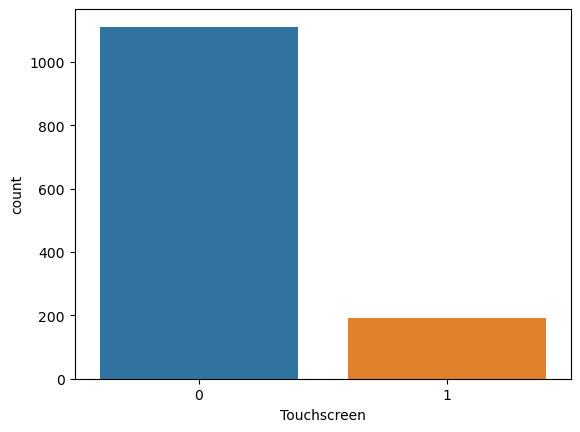

In [27]:
#how many laptops in data are touchscreen
sns.countplot(df_laptop['Touchscreen'])

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

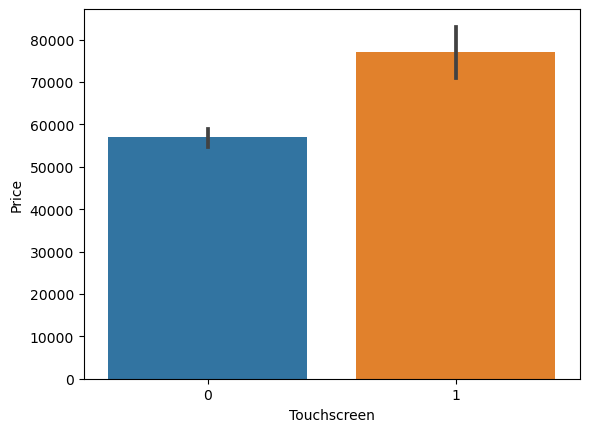

In [28]:
#BarPlot for touchscreen against price
sns.barplot(x=df_laptop['Touchscreen'],y=df_laptop['Price'])

<AxesSubplot:title={'center':'Variable Screen Size'}, xlabel='Inches', ylabel='Price'>

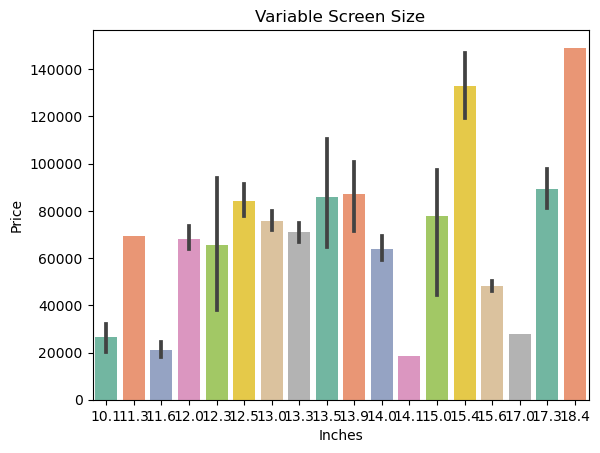

In [29]:
#Bar plot to show the relationship between 'Inches' and 'Price
plt.subplot()
plt.gca().set_title('Variable Screen Size')
sns.barplot(x=df_laptop['Inches'], y=df_laptop['Price'], palette='Set2')

<AxesSubplot:xlabel='Company', ylabel='Cpu'>

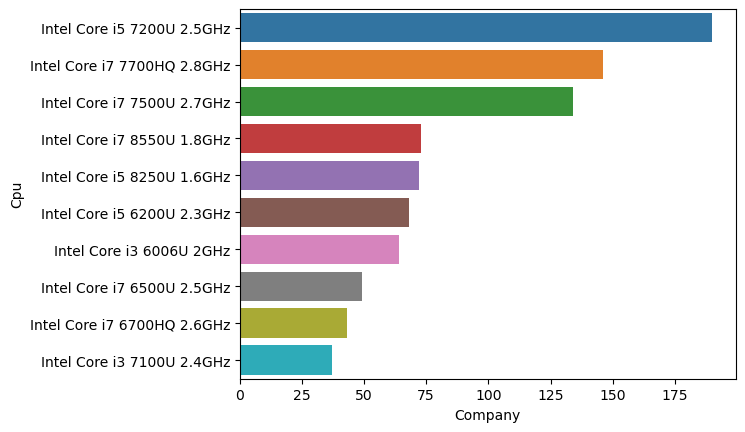

In [30]:
#Plotting Barplot for top 10 cpu 
cpu = df_laptop[['Cpu','Company']].groupby('Cpu').agg('count').sort_values('Company', ascending=False).reset_index()
sns.barplot(data=cpu.head(10), x="Company", y="Cpu")

<AxesSubplot:xlabel='Company', ylabel='Gpu'>

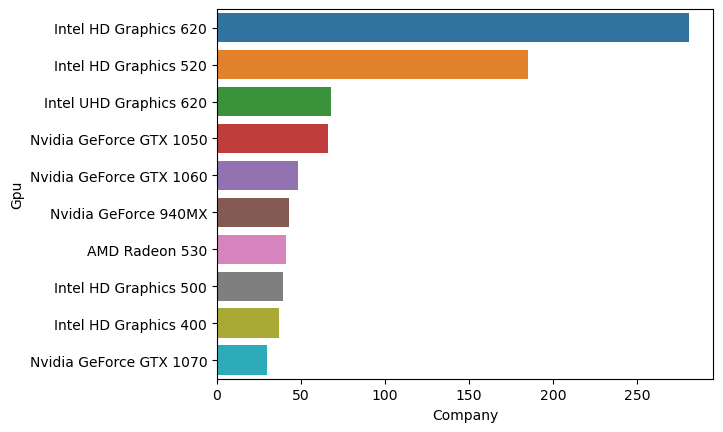

In [31]:
#Plotting Barplot for top 10 gpu 
gpu = df_laptop[['Gpu','Company']].groupby('Gpu').agg('count').sort_values('Company', ascending=False).reset_index()
sns.barplot(data=gpu.head(10), x="Company", y="Gpu")

<function matplotlib.pyplot.show(close=None, block=None)>

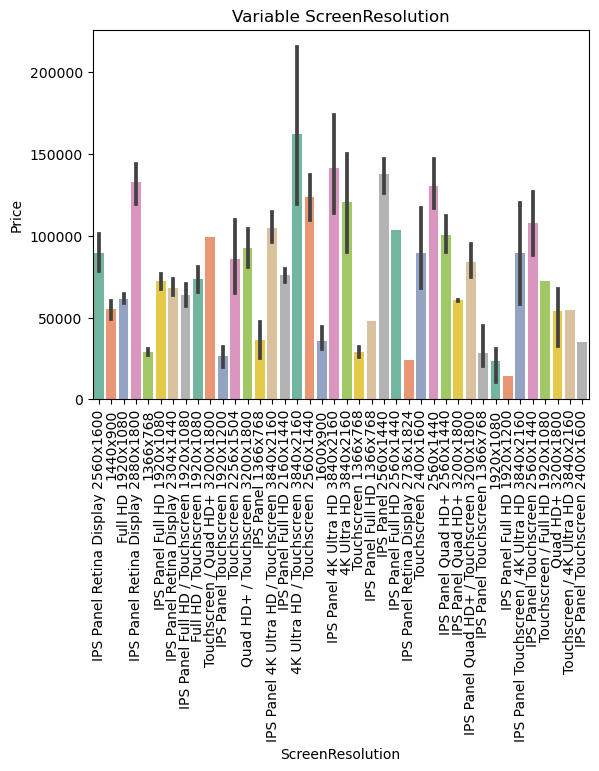

In [32]:
#Bar plot for the relationship between 'Screen Resolution' and 'Price
plt.subplot()
plt.gca().set_title('Variable ScreenResolution')
sns.barplot(x=df_laptop['ScreenResolution'], y=df_laptop['Price'], palette='Set2')
plt.xticks(rotation='vertical')
plt.show

Log-Normal Transformation

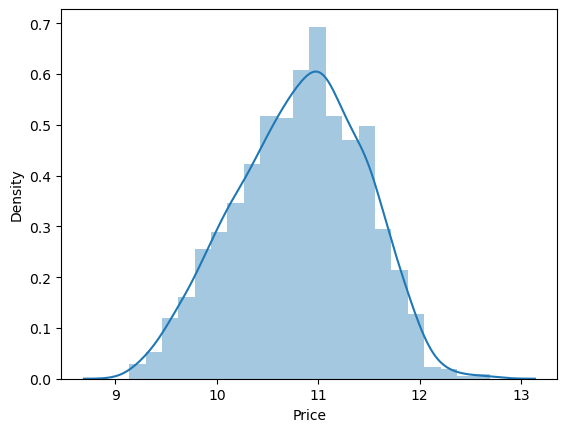

In [33]:
#Distribution plot of the logarithm of 'Price' column.
sns.distplot(np.log(df_laptop['Price']))
plt.show()

# Model Building

Label Encoder

In [34]:
df_laptop = df_laptop.drop([ 'Cpu', 'Gpu', 'CPU_avg', 'GPU_avg'], axis = 1)

In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Manufacturer = LabelEncoder()
label_encoder_Category = LabelEncoder()
label_encoder_Screen_Size = LabelEncoder()
label_encoder_Screen = LabelEncoder()
label_encoder_RAM = LabelEncoder()
label_encoder_Storage = LabelEncoder()
label_encoder_Operating_System = LabelEncoder()
label_encoder_Operating_System_Version = LabelEncoder()

df_laptop['Company'] = label_encoder_Manufacturer.fit_transform(df_laptop['Company'])
df_laptop['TypeName'] = label_encoder_Category.fit_transform(df_laptop['TypeName'])
df_laptop['Inches'] = label_encoder_Screen_Size.fit_transform(df_laptop['Inches'])
df_laptop['ScreenResolution'] = label_encoder_Screen.fit_transform(df_laptop['ScreenResolution'])
df_laptop['Ram'] = label_encoder_RAM.fit_transform(df_laptop['Ram'])
df_laptop['Memory'] = label_encoder_Storage.fit_transform(df_laptop['Memory'])
df_laptop['OpSys'] = label_encoder_Operating_System.fit_transform(df_laptop['OpSys'])

Split in train and test test

In [36]:
X = df_laptop.drop(columns=['Price'])

In [37]:
y = np.log(df_laptop['Price'])

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

StandardScaler

Here we will use StandardScaler to put our data in the same scale.

In [39]:
# Importing required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training a Decision Tree model with the specified hyperparameters
regressor_dt = DecisionTreeRegressor(max_depth=7, random_state=0)
regressor_dt.fit(X_train, y_train)

# Evaluating the Decision Tree model
dt_train_score = regressor_dt.score(X_train, y_train)
dt_test_score = regressor_dt.score(X_test, y_test)
dt_predictions = regressor_dt.predict(X_test)
mae_dt = mean_absolute_error(y_test, dt_predictions)
mse_dt = mean_squared_error(y_test, dt_predictions)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, dt_predictions)

print('Train Score:', dt_train_score)
print('Test Score:', dt_test_score)
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)
print('R2 Score:', r2_dt)


Train Score: 0.838179610215042
Test Score: 0.7564667564908902
MAE: 0.2324473452679159
MSE: 0.09295867830891559
RMSE: 0.3048912565307762
R2 Score: 0.7564667564908902


In [40]:
# Importing required libraries
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training an XGBoost model with the specified hyperparameters
regressor_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0)
regressor_xgb.fit(X_train, y_train)

# Evaluating the XGBoost model
xgb_train_score = regressor_xgb.score(X_train, y_train)
xgb_test_score = regressor_xgb.score(X_test, y_test)
xgb_predictions = regressor_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
mse_xgb = mean_squared_error(y_test, xgb_predictions)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, xgb_predictions)

print('Train Score:', xgb_train_score)
print('Test Score:', xgb_test_score)
print('MAE:', mae_xgb)
print('MSE:', mse_xgb)
print('RMSE:', rmse_xgb)
print('R2 Score:', r2_xgb)

Train Score: 0.9593833687644503
Test Score: 0.8726578097560644
MAE: 0.1755856817162231
MSE: 0.04860758033469844
RMSE: 0.22047126872837294
R2 Score: 0.8726578097560644


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard_train = scaler.fit_transform(X_train)
y_standard_train = scaler.fit_transform(y_train.values.reshape(-1,1))
X_standard_test = scaler.fit_transform(X_test)
y_standard_test = scaler.fit_transform(y_test.values.reshape(-1,1))

Here we will use the Random Forest Model, we will test squared_error, absolute_error and friedman_mse calculations.

Applying GridSearch

In [42]:

from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators': [100],
              'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
             }

model = RandomForestRegressor()
gridRandomForest = RandomizedSearchCV(model,parameters, cv = 2)
gridRandomForest.fit(X_train, y_train.ravel())

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  friedman_mse
Score:  0.7582151853158434
Mín Split:  6
Max Nvl:  11


Running Random Forest

In [43]:
#RandomForestRegressor model with the specified hyperparameters
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, 
max_depth= 7,  criterion = 'squared_error', random_state = 0)
regressor_rf.fit(X_train, y_train)
normal_rf = regressor_rf.score(X_train, y_train)
normal_rf_test = regressor_rf.score(X_test, y_test)
previsoes = regressor_rf.predict(X_test)
mae_normal_rf  = mean_absolute_error(y_test, previsoes)
mse_normal_rf = mean_squared_error(y_test, previsoes)
rmse_normal_rf = np.sqrt(mean_squared_error(y_test, previsoes))
r2_normal_rf = r2_score(y_test, previsoes)

print('Train : ', normal_rf)
print('Test :', normal_rf_test)
print('MAE :', mae_normal_rf)
print('MSE :', mse_normal_rf)
print('RMSE :', rmse_normal_rf)
print('R2 :', r2_normal_rf)

Train :  0.8626290068555048
Test : 0.8077461262928047
MAE : 0.21365738489342595
MSE : 0.07338491346016798
RMSE : 0.27089649953472633
R2 : 0.8077461262928047


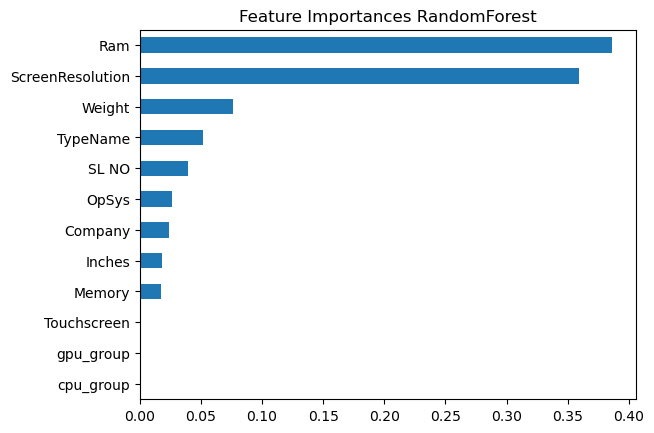

In [44]:
#Plotting Feature Importances using RandomForestRegressor
columns = df_laptop.drop('Price', axis = 1).columns
feature_imp_random = pd.Series(regressor_rf.feature_importances_, index = columns).sort_values(ascending = True)
feature_imp_random.plot(kind = 'barh')
plt.title('Feature Importances RandomForest')
plt.show()

In [45]:
# Finding the Random foreset predictve price 
df_display = X_test.copy()
df_display = df_display.drop(['TypeName', 'Company', 'Inches', 'ScreenResolution', 'Ram', 'OpSys', 'Weight', 'cpu_group', 'gpu_group', 'Memory', 'Touchscreen'], axis=1)
df_display["real price"] = np.exp(y_test)
df_display["rf pred"] = np.exp(previsoes)
df_display.reset_index(drop=True, inplace=True)
df_display.index = df_display.index.astype(int)
df_display.index.name = 'Index'
print(df_display.head(21))


       SL NO   real price        rf pred
Index                                   
0        248   35964.0000   26138.976921
1        556   13586.4000   21705.122407
2        693  137995.2000   78683.570123
3        387   72940.3200   97089.385076
4        781  125208.0000  111819.195954
5        379   45074.8800   47529.260307
6        716   62817.1200   57813.851394
7        880   90576.0000   47574.182943
8        654   19441.8720   20312.250782
9        994   47365.9200   57813.851394
10       825   26586.7200   39792.046600
11       743   53226.7200   57940.519020
12      1243   95850.7200   90030.903367
13       335   67559.0400   69487.321706
14       708   63456.4800   57940.519020
15       235   47898.7200   86155.131872
16       332   71075.5200   50558.244603
17      1139  115709.2416   64269.909519
18       739   21887.4240   25531.117139
19       573   44222.4000   57601.057962
20       270  104370.1920   79666.364007
